# Mann Whitney U Test

<!--
import data_analytics.github as github
print(github.create_jupyter_notebook_header("markcrowe-com", "statistics", "mann-whitney-u-test/mann-whitney-u-test.ipynb", "master"))
-->
<table style="margin: auto;"><tr><td><a href="https://mybinder.org/v2/gh/markcrowe-com/statistics/master?filepath=mann-whitney-u-test/mann-whitney-u-test.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open In Binder"/></a></td><td>online editors</td><td><a href="https://colab.research.google.com/github/markcrowe-com/statistics/blob/master/mann-whitney-u-test/mann-whitney-u-test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></td></tr></table>

## Setup

Import required third party Python libraries, import supporting functions and sets up data source file paths.

In [1]:
# Local
#!pip install -r script/requirements.txt
# Remote option
#!pip install -r https://raw.githubusercontent.com/markcrowe-com/agriculture-data-analytics/requirements.txt
#Options: --quiet --user

In [2]:
from scipy.stats import mannwhitneyu
from pandas import DataFrame, read_csv
import numpy

## Mann Whitney U Test

### Objectives and characteristics of this test

- This test is another non-parametric test that wants to confirm whether or not there are differences between the median values of two populations.
- Scale: ordinal.
- It is not necessary to assume normal distribution for the original variable.
- We analyze two independent samples.
- The unit of measurement has to be the same for both samples.
- We do not need to assume homogeneity between the variables.

- The alternative Hypothesis could be:  
  - < if we want to determine if the values of one sample are less than the other one
  - \> If we want to determine if the values of one sample are greater than the other one
  - ≠ if we want to determine whether there are differences or not
- This is the non=parametric version of the t-test for two populations means.
- This is also known as the Wilcoxon sum of rank test.

### Constants

In [3]:
ALPHA = 0.05

### Formula

$$
U=Min(U_1, U_2)  \\
z = \frac{U-m_U}{\sigma_U}  \\
m_U = \frac{n_1n_2}{2}  \\
\sigma_U=\sqrt{\frac{n_1n_2(n_1+n_2+1)}{12}} \\
\\
$$

#### All together

$$
z = \frac{U-\frac{n_1n_2}{2}}{\sqrt{\frac{n_1n_2(n_1+n_2+1)}{12}}}
$$

### function

In [4]:
def calculate_z_score(test_statistic, sample1_size, sample2_size):
    U1 = test_statistic
    U2 = sample1_size * sample2_size - U1
    U = min(U1, U2)
    return (U - sample1_size * sample2_size / 2) / numpy.sqrt(
        sample1_size * sample2_size * (sample1_size + sample2_size + 1) / 12)

## Example

You work for a company that produces two brands of detergents: Super and Best. Before deciding the investment in advertising you need to know if there are differences in the acceptance between one and another one. The company gives a free trial to 25 people for the Super detergent and to 22 people for the detergent Best and asked them to qualify the performance from 1 to 10. You can find the results on the file "detergent-performance.csv". Try to find if one brand needs more publicity than the other one using 5% level of significance.

#### Hypothesis Statement
$H_0$: There is no difference in the performance of the detergents  
$H_1$: There is a difference in the performance of the detergents  
*For example, if you wanted to test whether Super is performing better than Best, the performance  
should be greater, this would be your test:  
$H_0$: There is no difference in the performance of the detergents  
$H_1$: Super performance is greater than Best  

### Load file

In [5]:
filename = 'detergent-performance.csv'

In [6]:
# remote
filepath = 'https://github.com/markcrowe-com/statistics/blob/master/mann-whitney-u-test/'+ filename + '?raw=true'

In [7]:
# local
filepath = filename

In [8]:
dataframe: DataFrame = read_csv(filepath)

In [9]:
dataframe.head()

,Detergent,Performance
0,Super,2
1,Super,3
2,Super,4
3,Best,4
4,Best,4


### Format Data

In [10]:
super_dataframe: DataFrame = dataframe[(dataframe['Detergent'] == "Super")].reset_index()
best_dataframe: DataFrame = dataframe[(dataframe['Detergent'] == "Best")].reset_index()

In [11]:
super_dataframe.head()

,index,Detergent,Performance
0,0,Super,2
1,1,Super,3
2,2,Super,4
3,7,Super,5
4,8,Super,5


In [12]:
sample1 = best_dataframe['Performance']
sample2 = super_dataframe['Performance']

### The Math

In [13]:
test_statistic, p_value = mannwhitneyu(sample1, sample2)
z_score = calculate_z_score(test_statistic, len(sample1), len(sample2))

print('Test-statistic (U) = %.3f, p-value = %.3f' % (test_statistic, p_value))
print('Z-score = %.3f' % z_score)

Test-statistic (U) = 273.500, p-value = 0.983
Z-score = -0.032


### Graph

Work in progress  
<https://share.streamlit.io/harmkenn/python-stat-tools/main/app.py>  
<https://github.com/harmkenn/python-stat-tools/>  

In [14]:
import math
from scipy.stats import *
import pandas as pd
from plotnine import *

lzp = -1.96
rzp = 1.0
zpc = 1.96

tp = 0

lzp = lzp

ls = -1.0
zpc = 1
rs = 0

rzp = rzp

x = numpy.arange(-4,4,.1)
y = norm.pdf(x)
ndf = pd.DataFrame({"x":x,"y":y})

normp = ggplot(ndf)  
if ls:
    tp = tp + norm.cdf(lzp)
    normp = normp + stat_function(fun = norm.pdf, geom = "area",fill = "steelblue", xlim = (-4,lzp))
if zpc:
    tp = tp + norm.cdf(rzp) - norm.cdf(lzp)
    normp = normp + stat_function(fun = norm.pdf, geom = "area",fill = "steelblue", xlim = (lzp,rzp))
if rs:
    tp = tp + 1 - norm.cdf(rzp)
    normp = normp + stat_function(fun = norm.pdf, geom = "area",fill = "steelblue", xlim = (rzp,4))
normp = normp + geom_segment(aes(x = lzp, y = 0, xend = lzp, yend = norm.pdf(lzp)),color="red")
normp = normp + geom_segment(aes(x = rzp, y = 0, xend = rzp, yend = norm.pdf(rzp)),color="red")
normp = normp + geom_line(aes(x=x,y=y)) + coord_fixed(ratio = 4) + xlab('z') + ylab('')

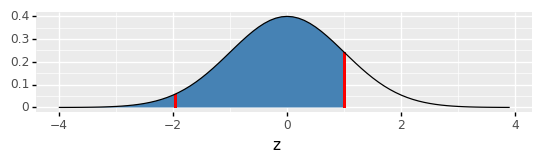

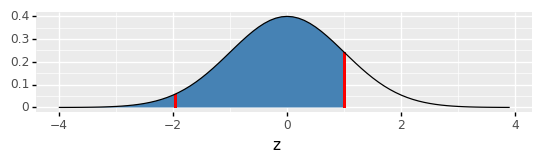

In [15]:
ggplot.draw(normp)

### Interpretation

In [16]:
if p_value > ALPHA:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Same distributions (fail to reject H0)


According to the test and at a 5% of significance level, we can say that there is no evidence to say that
there are differences in the consumer's preferences between the brands